In [53]:
#importing important libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [54]:
# importing the dataset 
df=pd.read_csv("onlinefoods.csv")
df.head()

# remnaming the columns for convinence
df.rename(columns={"Age":"age","Gender":"gender","Marital Status":"relationship","Occupation":"work","Monthly Income":"income",
                  "Educational Qualifications":"degree","Family size":"family_size","Pin code":"pincode","Output":"output","Feedback":"feedback"},inplace=True)

In [55]:
# drop the unnamed columns 
df.drop(columns=["Unnamed: 12"],inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           388 non-null    int64  
 1   gender        388 non-null    object 
 2   relationship  388 non-null    object 
 3   work          388 non-null    object 
 4   income        388 non-null    object 
 5   degree        388 non-null    object 
 6   family_size   388 non-null    int64  
 7   latitude      388 non-null    float64
 8   longitude     388 non-null    float64
 9   pincode       388 non-null    int64  
 10  output        388 non-null    object 
 11  feedback      388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [57]:
# income datatype correction
df["income"].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [58]:
income_map = {'No Income': 0,
           'Below Rs.10000': 1,
           '10001 to 25000': 2,
           '25001 to 50000': 3,
           'More than 50000': 4}
df["income"]=df['income'].replace(income_map).infer_objects(copy=False)

In [59]:
df.head()

,age,gender,relationship,work,income,degree,family_size,latitude,longitude,pincode,output,feedback
0,20,Female,Single,Student,0,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,1,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,1,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,0,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,1,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [60]:
df.describe()

,age,income,family_size,latitude,longitude,pincode
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,1.469072,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.591831,1.351025,0.044489,0.051354,31.399609
min,18.000000,0.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,0.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,1.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,3.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,4.000000,6.000000,13.102000,77.758200,560109.000000


<Axes: ylabel='Density'>

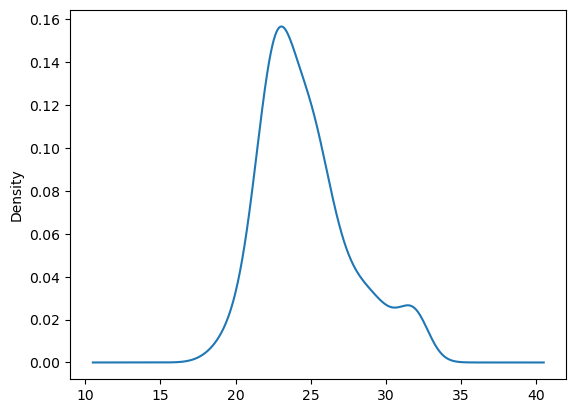

In [61]:
df["age"].plot(kind="kde")

<Axes: title={'center': 'Age vs Income'}, xlabel='age', ylabel='income'>

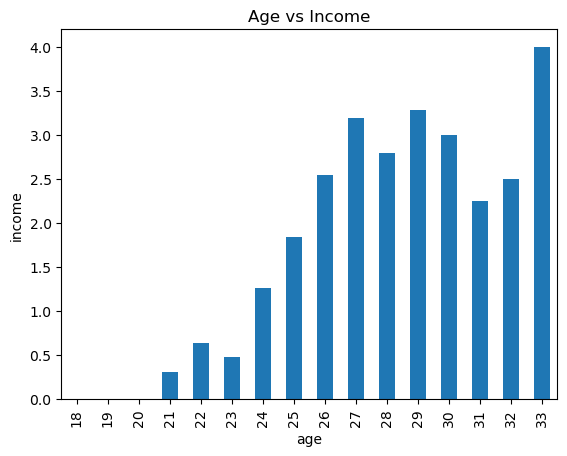

In [62]:
# average income by age 
avg_income = df.groupby("age").income.mean()
avg_income.plot(kind="bar",ylabel="income",title="Age vs Income")
# people of age 18,19 and 20 have no income and age 33 have max income and we can also analyze that 29 years old earns more than  30,31,32

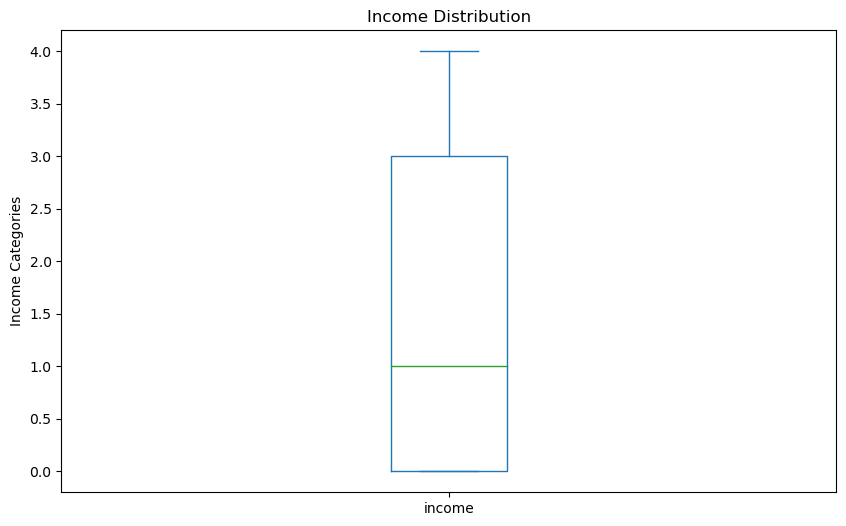

In [63]:
# box plot
plt.figure(figsize=(10, 6))
df['income'].plot(kind='box', title='Income Distribution')
plt.ylabel('Income Categories')
plt.show()

<Axes: xlabel='income'>

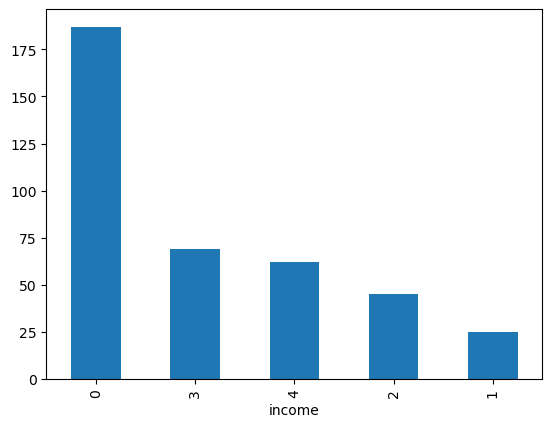

In [64]:
df["income"].value_counts().plot(kind="bar")


<Axes: xlabel='gender'>

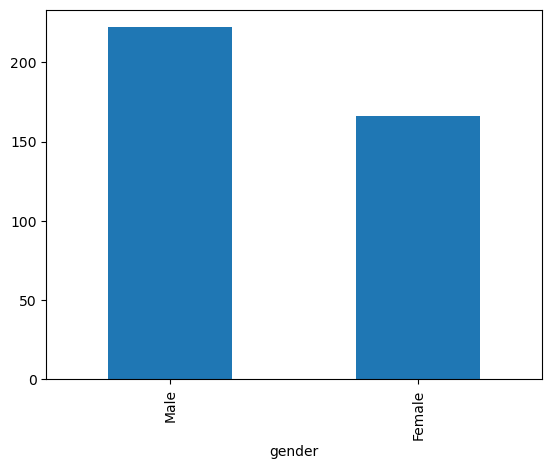

In [65]:
# gender
df["gender"].value_counts().plot(kind="bar")

In [66]:
# income vs gender 

avg_income=df.groupby("gender").income.mean()
avg_income


gender
Female    1.228916
Male      1.648649
Name: income, dtype: float64

<Axes: xlabel='gender'>

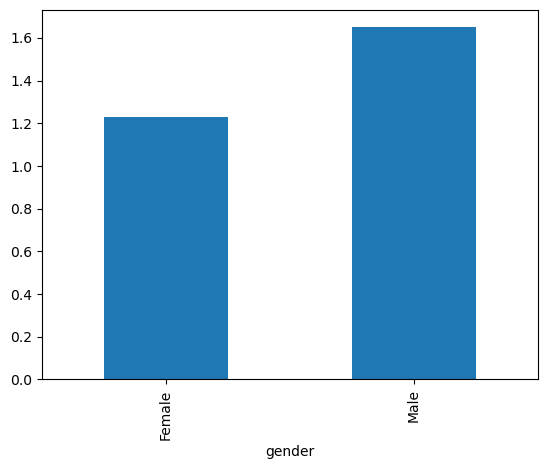

In [67]:
# average income as per gender 
avg_income.plot(kind="bar")

In [68]:
df["work"].value_counts()


work
Student           207
Employee          118
Self Employeed     54
House wife          9
Name: count, dtype: int64

In [69]:
work_by_gender=df.groupby("gender").work
work_by_gender.value_counts()


gender  work          
Female  Student            92
        Employee           49
        Self Employeed     16
        House wife          9
Male    Student           115
        Employee           69
        Self Employeed     38
Name: count, dtype: int64

<Axes: title={'center': 'Income vs Degree'}, xlabel='degree,income', ylabel='count'>

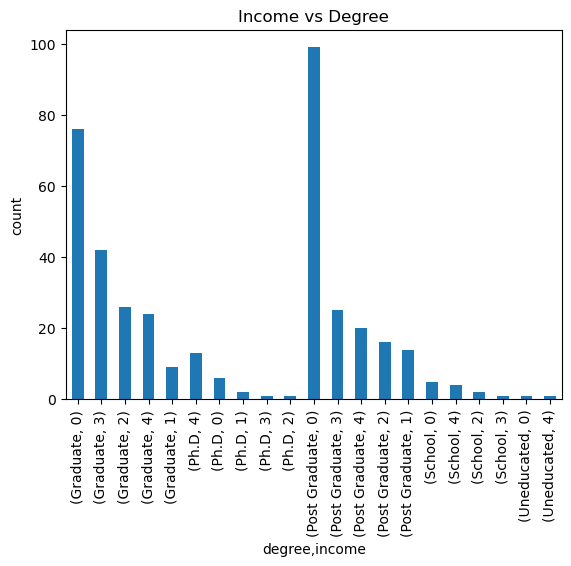

In [70]:
# professional degree and income 
degree_by_income = df.groupby("degree").income
degree_by_income.value_counts().plot(kind="bar",ylabel="count",title="Income vs Degree")


<Axes: title={'center': 'Gender vs Degree'}, xlabel='degree,gender', ylabel='count'>

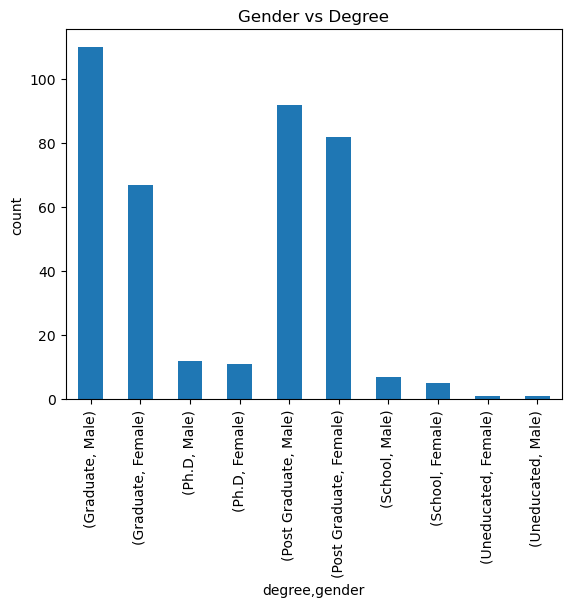

In [71]:
# gender vs the professional degree
degree_by_income = df.groupby("degree").gender
degree_by_income.value_counts().plot(kind="bar",ylabel="count",title="Gender vs Degree")

In [72]:
# highest earner 
highest_earners = df.groupby(['degree', 'gender'])['income'].agg('mean').reset_index().sort_values(by="income")
print(highest_earners.pivot)


<bound method DataFrame.pivot of           degree  gender    income
6         School  Female  0.000000
8     Uneducated  Female  0.000000
4  Post Graduate  Female  1.085366
2           Ph.D  Female  1.181818
5  Post Graduate    Male  1.217391
0       Graduate  Female  1.522388
1       Graduate    Male  1.645455
7         School    Male  3.285714
3           Ph.D    Male  3.833333
9     Uneducated    Male  4.000000>


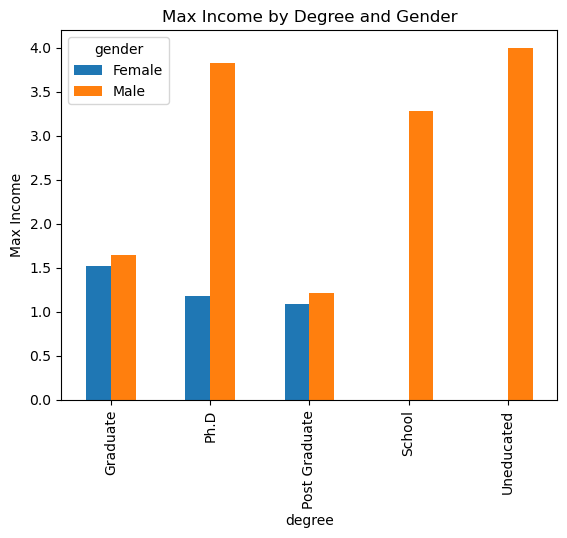

In [73]:
highest_earners.pivot(index='degree', columns='gender', values='income').plot(kind='bar')
plt.ylabel('Max Income')
plt.title('Max Income by Degree and Gender')
plt.show()


In [74]:

# converting dataframe to tensor
def helper(x):
    convert = {"Yes": 1,
               "No": 0}
    return convert[x]

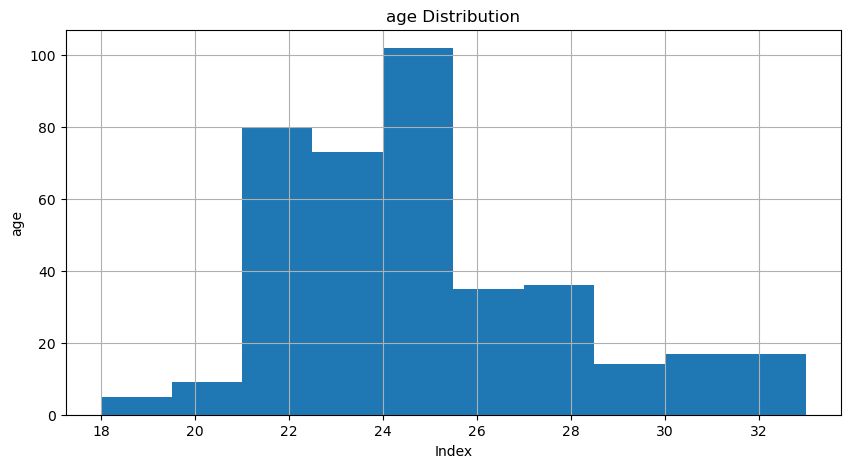

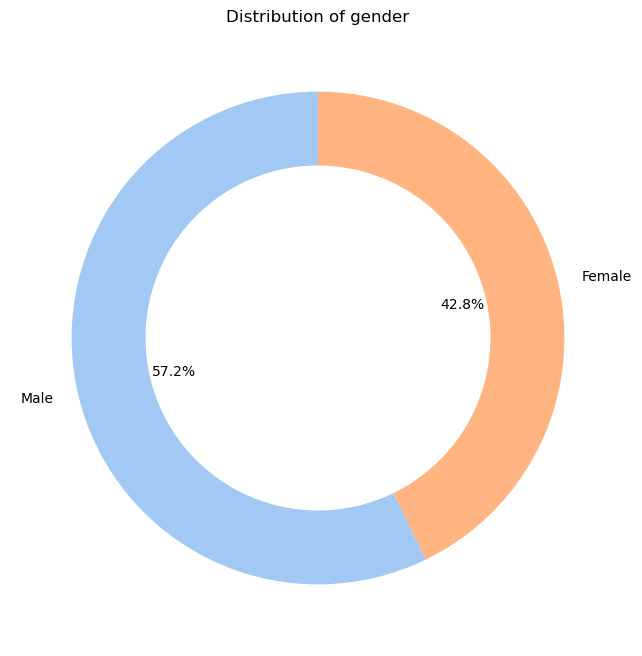

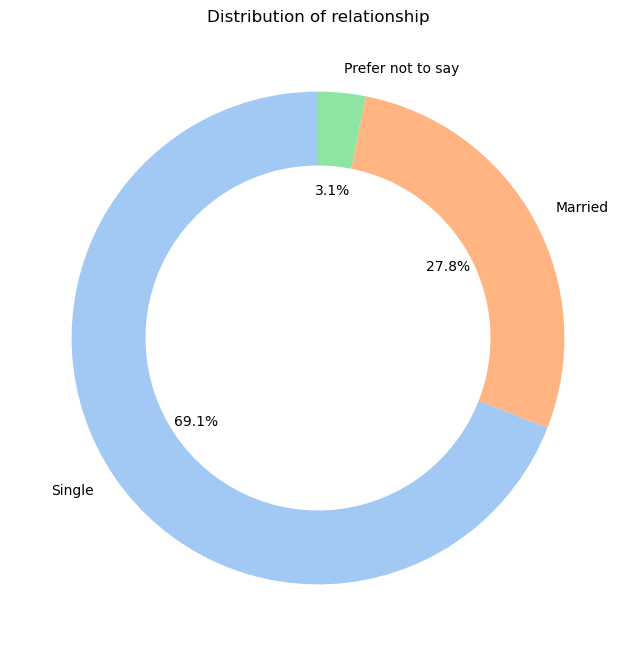

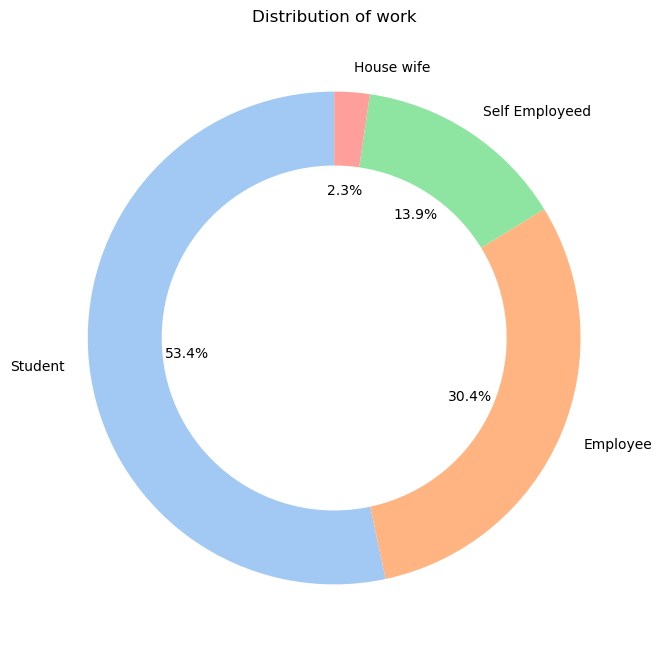

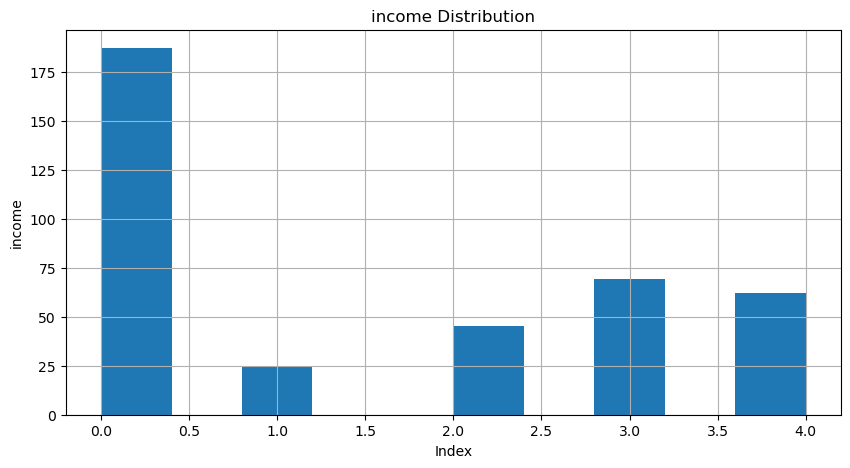

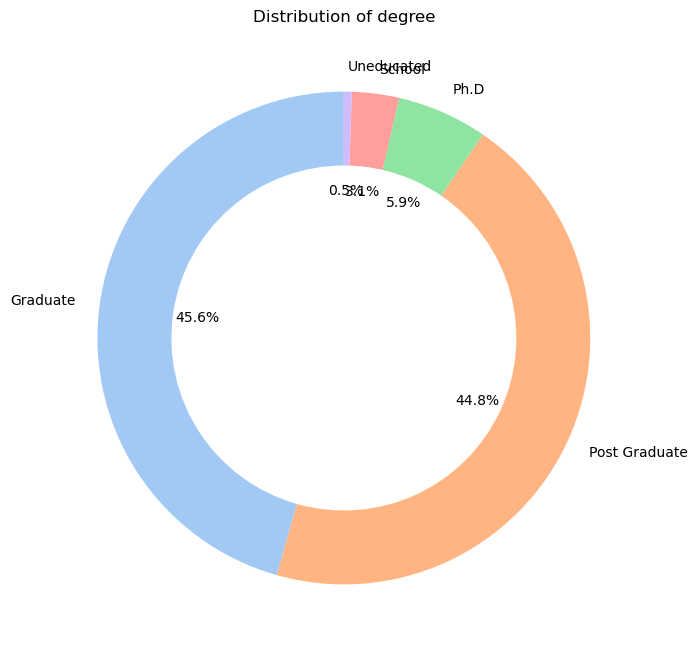

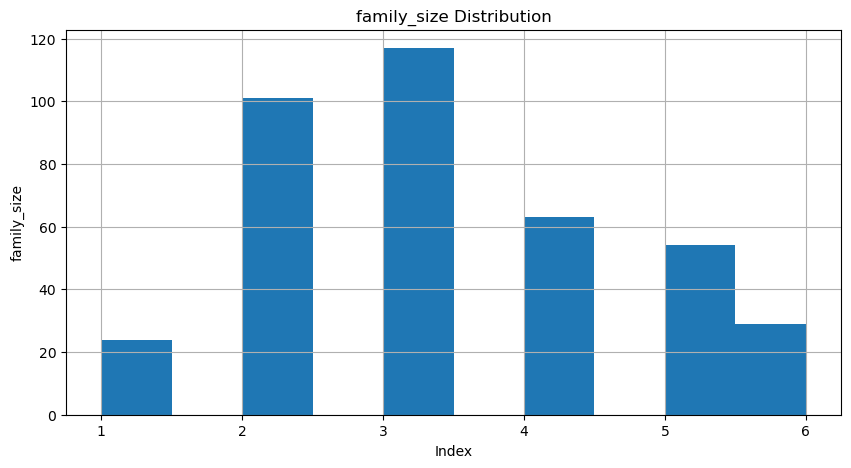

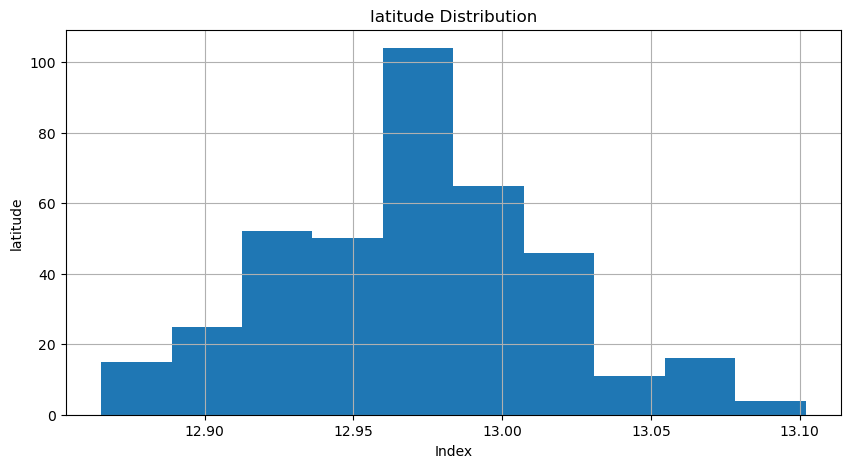

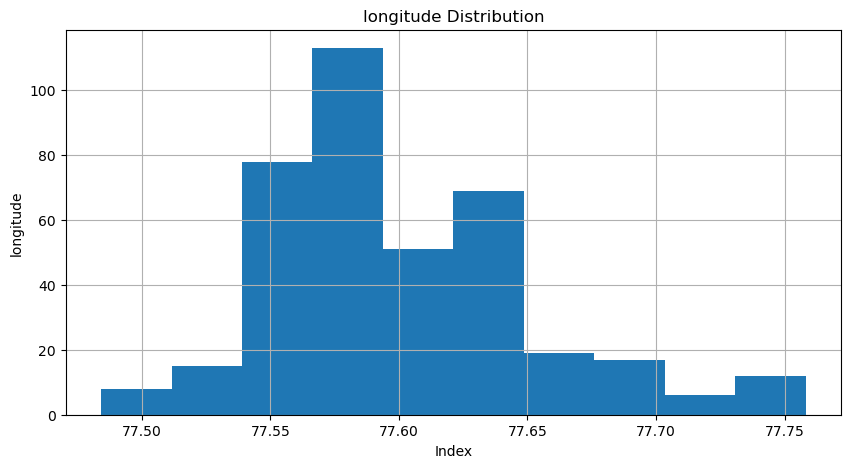

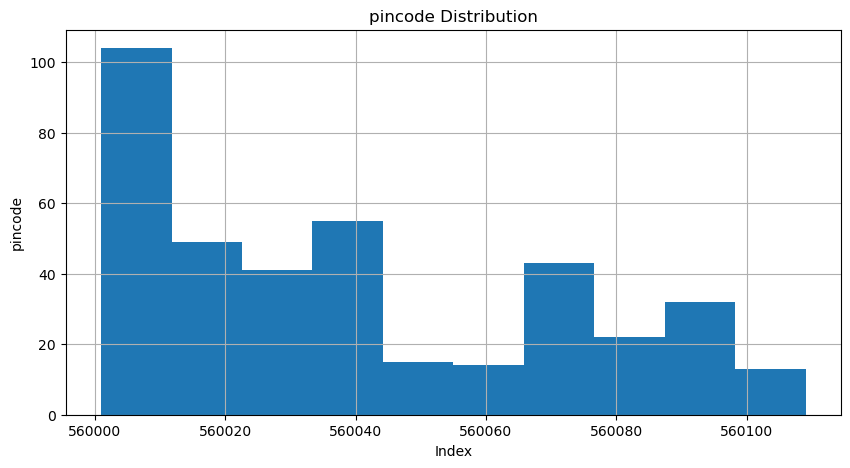

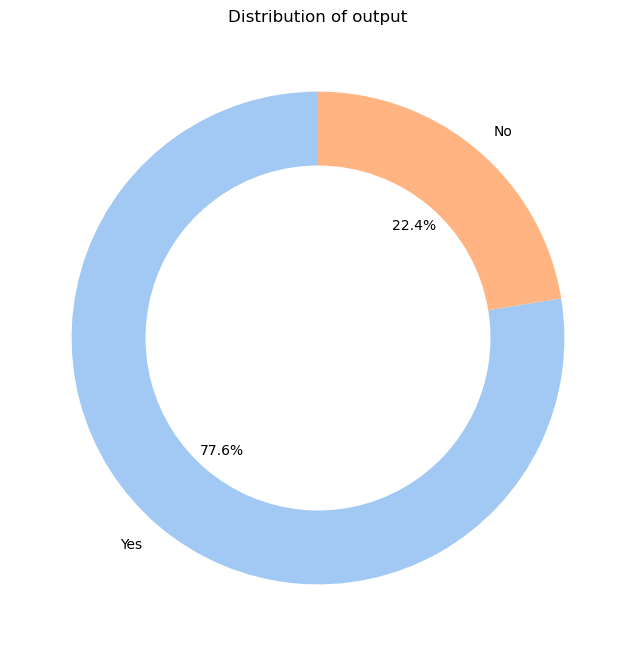

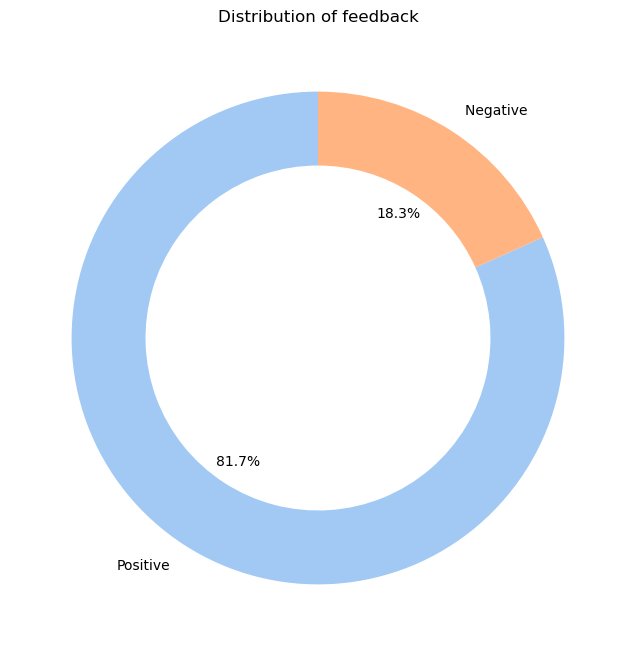

In [75]:
# Function to plot pie chart
def plot_pie_chart(column):
    plt.figure(figsize=(8, 8))
    df[column].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()
    
    
def plot_hist_chart(column):
    plt.figure(figsize=(10, 5))
    df[column].hist()
    plt.title(f'{column} Distribution')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

# Plotting for each column
for col in df.columns:
    if df[col].dtype == 'object':
        plot_pie_chart(col)
    else:
        plot_hist_chart(col)

In [76]:
!pip install torch torchvision torchaudio


In [77]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
import os

In [79]:
df.drop('output', axis=1)

,age,gender,relationship,work,income,degree,family_size,latitude,longitude,pincode,feedback
0,20,Female,Single,Student,0,Post Graduate,4,12.9766,77.5993,560001,Positive
1,24,Female,Single,Student,1,Graduate,3,12.9770,77.5773,560009,Positive
2,22,Male,Single,Student,1,Post Graduate,3,12.9551,77.6593,560017,Negative
3,22,Female,Single,Student,0,Graduate,6,12.9473,77.5616,560019,Positive
4,22,Male,Single,Student,1,Post Graduate,4,12.9850,77.5533,560010,Positive
...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,0,Post Graduate,2,12.9766,77.5993,560001,Positive
384,23,Female,Single,Student,0,Post Graduate,4,12.9854,77.7081,560048,Positive
385,22,Female,Single,Student,0,Post Graduate,5,12.9850,77.5533,560010,Positive
386,23,Male,Single,Student,1,Post Graduate,2,12.9770,77.5773,560009,Positive


In [82]:
# Separate features and labels
y = np.array(list((map(helper, df['output'])))).astype('int64')
df_one_hot = pd.get_dummies(df.drop('output', axis=1)).values.astype('float32') 

# Convert features and labels to PyTorch tensors
features_tensor = torch.tensor(df_one_hot)
labels_tensor = torch.tensor(y)

# Create a TensorDataset
dataset = TensorDataset(features_tensor, labels_tensor)

# Wrap the dataset in a DataLoader
batch_size = 64  # Adjust batch size to your preference
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [87]:
# create the model
import torch.nn.functional as F



class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
#         self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.BatchNorm1d(22),
            nn.Linear(22, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 2),
        )

    def forward(self, x):
#         x = self.flatten(x)
        x = self.linear_relu_stack(x)
        x = F.log_softmax(x, dim=1)
        return x

In [88]:
# Example loss function and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()  # Common choice for classification tasks
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer
# Example training loop
for epoch in range(10):
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass: Compute predicted y by passing inputs to the model
        outputs = model(inputs)
        # Compute loss
        loss = criterion(outputs, labels)
        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print statistics
#         if (i+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{10}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    


Epoch [1/10], Step [1/7], Loss: 0.7116
Epoch [1/10], Step [2/7], Loss: 0.6983
Epoch [1/10], Step [3/7], Loss: 0.6745
Epoch [1/10], Step [4/7], Loss: 0.6729
Epoch [1/10], Step [5/7], Loss: 0.6872
Epoch [1/10], Step [6/7], Loss: 0.6744
Epoch [1/10], Step [7/7], Loss: 0.6652
Epoch [2/10], Step [1/7], Loss: 0.6313
Epoch [2/10], Step [2/7], Loss: 0.6566
Epoch [2/10], Step [3/7], Loss: 0.6179
Epoch [2/10], Step [4/7], Loss: 0.6035
Epoch [2/10], Step [5/7], Loss: 0.6253
Epoch [2/10], Step [6/7], Loss: 0.5953
Epoch [2/10], Step [7/7], Loss: 0.6599
Epoch [3/10], Step [1/7], Loss: 0.6161
Epoch [3/10], Step [2/7], Loss: 0.5678
Epoch [3/10], Step [3/7], Loss: 0.5535
Epoch [3/10], Step [4/7], Loss: 0.5724
Epoch [3/10], Step [5/7], Loss: 0.5710
Epoch [3/10], Step [6/7], Loss: 0.5146
Epoch [3/10], Step [7/7], Loss: 0.8277
Epoch [4/10], Step [1/7], Loss: 0.5335
Epoch [4/10], Step [2/7], Loss: 0.5225
Epoch [4/10], Step [3/7], Loss: 0.5340
Epoch [4/10], Step [4/7], Loss: 0.5174
Epoch [4/10], Step [5/7],

In [90]:
test = pd.get_dummies(df.drop('output', axis=1)).values.astype('float32') 
features_tensor = torch.tensor(test).float()[200:]
y_true = y[200:]
with torch.no_grad():
    model.eval()

    predictions = model(features_tensor)

    # Convert predictions to probabilities using softmax if your model's output is logits
    probabilities = torch.softmax(predictions, dim=1)

    # Convert the probabilities to a numpy array
    # This step is optional and depends on what format you want for further processing.
    probabilities_np = probabilities.numpy()

# The probabilities now contain the predicted class probabilities for each sample.
# If you need to get the predicted class with the highest probability:
y_pred = torch.argmax(probabilities, dim=1).numpy()

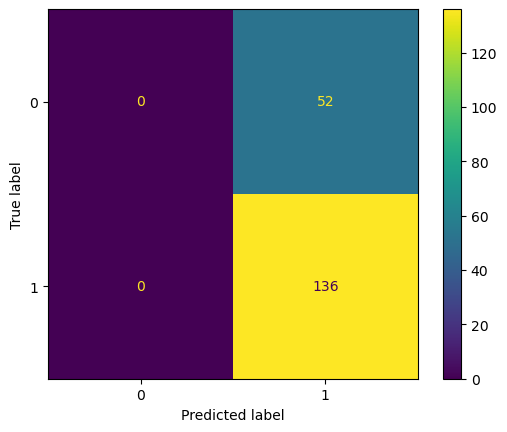

In [91]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()